In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Dataset :**

In [ ]:
df = pd.read_excel('loan_approval_dataset.xlsx')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## **EDA :**

In [ ]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
df.shape

(4269, 13)

In [ ]:
df['loan_id'] = df['loan_id'].astype('object')

In [ ]:
df.dtypes

,0
loan_id,object
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [ ]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.473928e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.502129e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
# Ouliers :
import plotly.express as px

fig = px.box(df, x=' income_annum')
fig.show()

fig2 = px.box(df, x=' no_of_dependents')
fig2.show()

In [ ]:
fig = px.box(df, x=' commercial_assets_value')
fig.show()

fig2 = px.box(df, x=' bank_asset_value')
fig2.show()

fig3 = px.box(df, x=' residential_assets_value')
fig3.show()

fig4 = px.box(df, x=' luxury_assets_value')
fig4.show()

We can see a presence of outliers that should be eliminated from the dataset.

In [ ]:
fig = px.box(df, x=' loan_amount')
fig.show()

fig2 = px.box(df, x=' cibil_score')
fig2.show()

fig3 = px.box(df, x=' loan_term')
fig3.show()

In [ ]:
# Removing outliers :

min,max = df[' commercial_assets_value'].quantile([0.001,0.999])
df = df[(df[' commercial_assets_value']< max) & (df[' commercial_assets_value']> min)]

In [ ]:
min,max = df[' bank_asset_value'].quantile([0.001,0.999])
df = df[(df[' bank_asset_value']< max) & (df[' bank_asset_value']> min)]

In [ ]:
min,max = df[' residential_assets_value'].quantile([0.001,0.999])
df = df[(df[' residential_assets_value']< max) & (df[' residential_assets_value']> min)]

<Axes: >

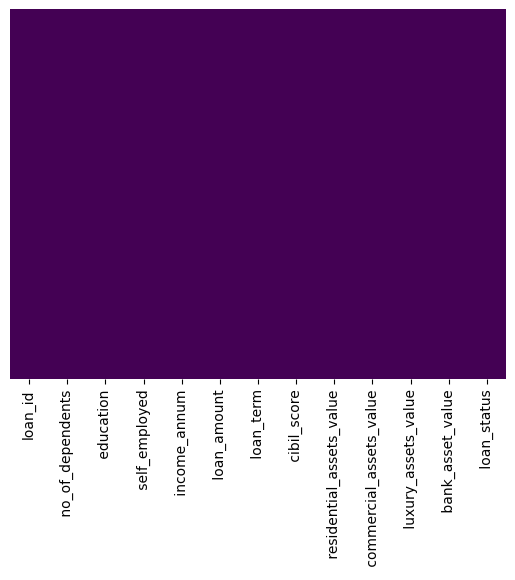

In [ ]:
# Missing values :
df.isna().sum()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No missing values

array([[<Axes: title={'center': ' no_of_dependents'}>,
        <Axes: title={'center': ' income_annum'}>,
        <Axes: title={'center': ' loan_amount'}>],
       [<Axes: title={'center': ' loan_term'}>,
        <Axes: title={'center': ' cibil_score'}>,
        <Axes: title={'center': ' residential_assets_value'}>],
       [<Axes: title={'center': ' commercial_assets_value'}>,
        <Axes: title={'center': ' luxury_assets_value'}>,
        <Axes: title={'center': ' bank_asset_value'}>]], dtype=object)

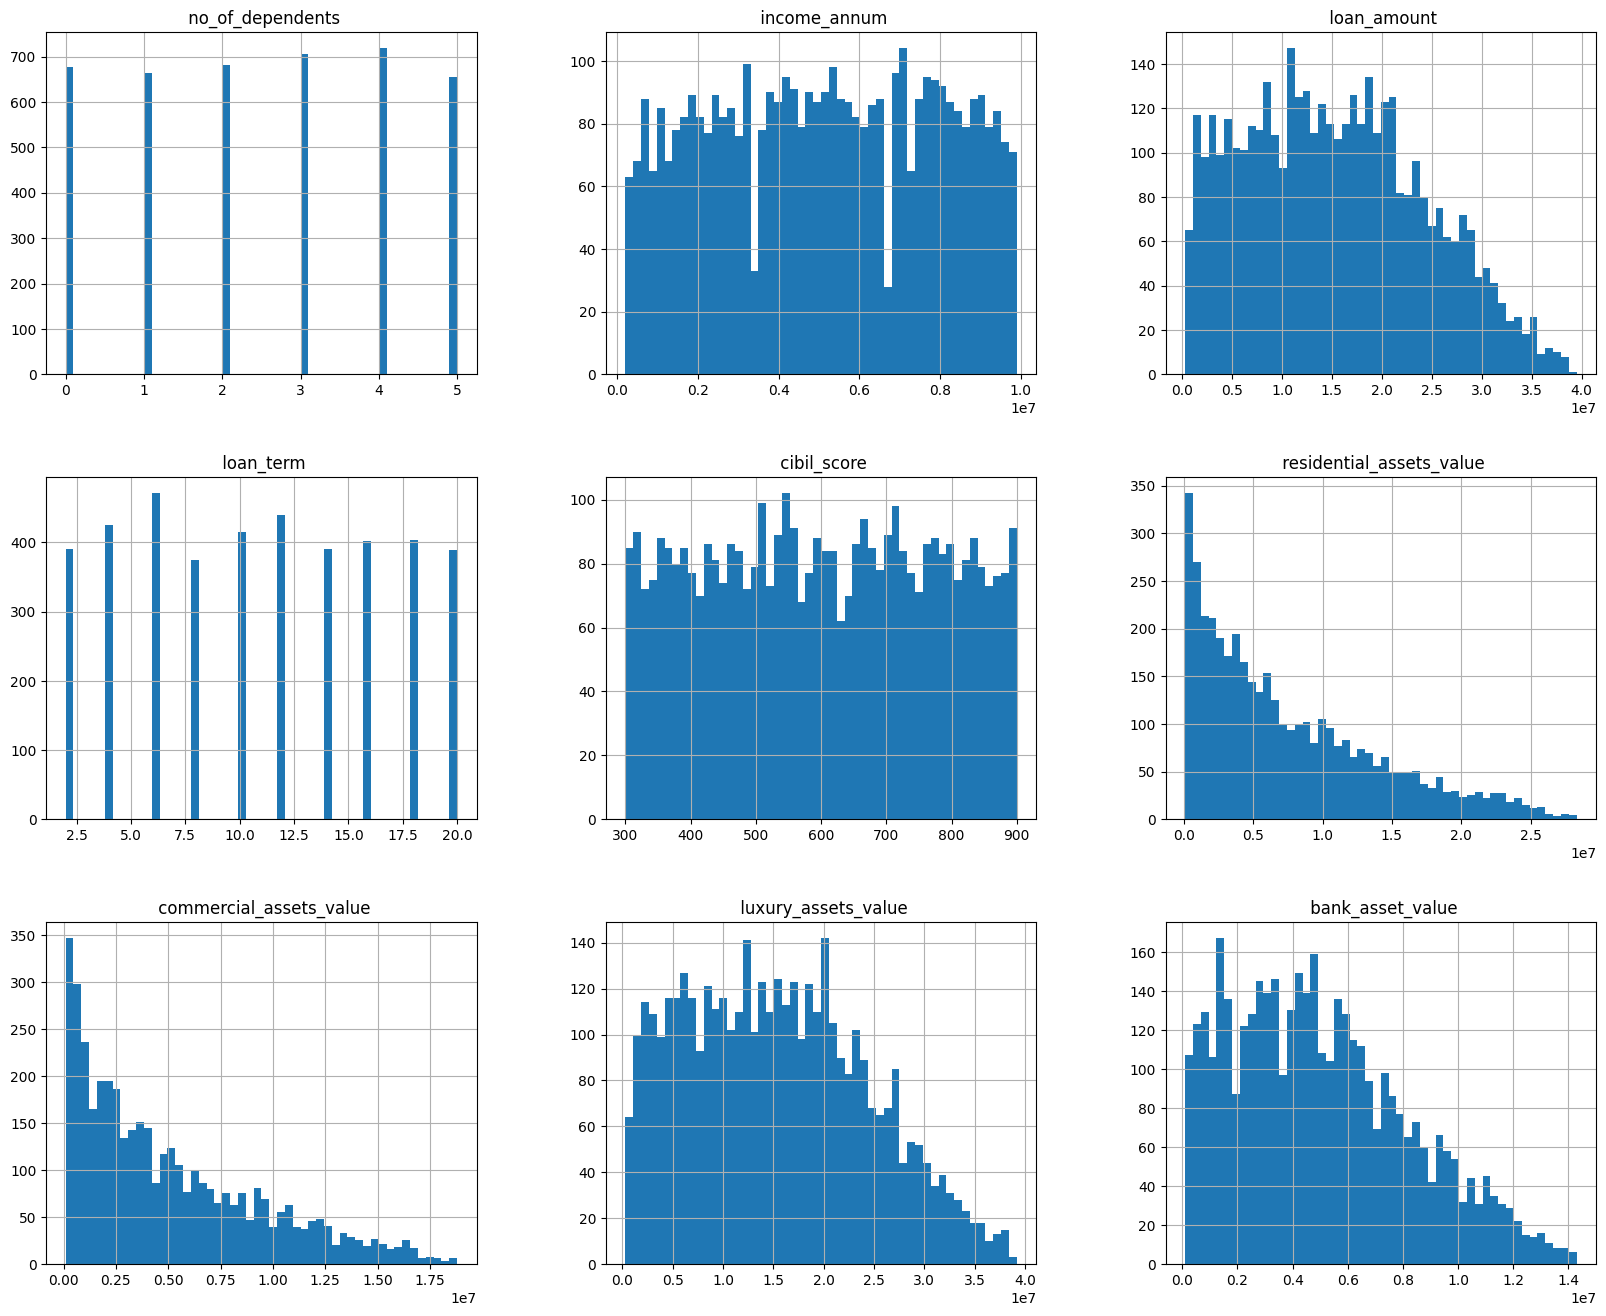

In [ ]:
# Histograms :
df.hist(bins=50,figsize=(20,16))

In [ ]:
fig = px.scatter(df, x=' income_annum', y =' loan_amount',  color = ' loan_status',opacity =0.8,  width=1000, height=1000 )
fig.show()

In [ ]:
fig = px.histogram(df, x=' cibil_score', color =' loan_status', title= '', opacity =0.8,  width=800, height=900 )
fig.show()

When the cibil score of the client is > 500, the loans are most likely to be approved.

In [ ]:
fig = px.histogram(df, x=' education', color =' loan_status', title= '', opacity =0.8,  width=1000, height=900 )
fig.show()

In [ ]:
fig = px.histogram(df, x=' self_employed', color =' loan_status', title= '', opacity =0.8,  width=1000, height=900 )
fig.show()

<Axes: >

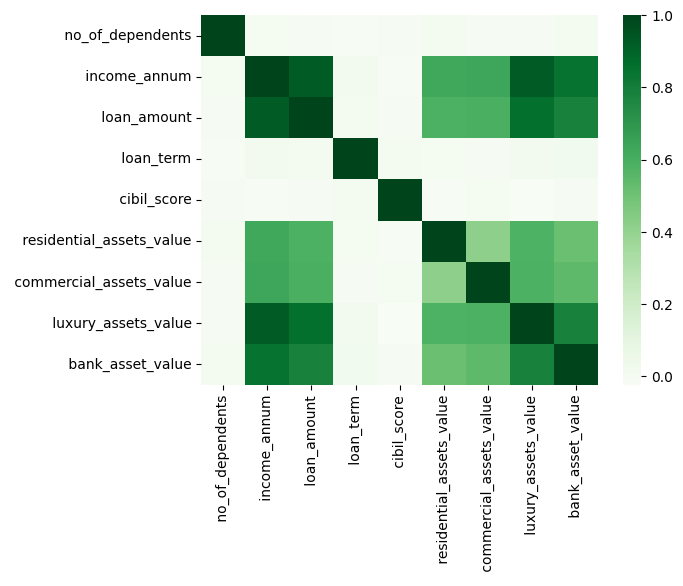

In [ ]:
# Correlation matrix
corr_matrix = df.corr(numeric_only= True)
sns.heatmap(corr_matrix, cmap="Greens")

Loan amount is correlated with income annum which is logical since the loan will be repaid in installments based on the borrower's salary.   
The values of both residential and commercial assets are correlated with the loan amount and annual income. This relationship is expected, as higher-value assets and greater income levels typically enable borrowers to secure larger loans.  
We will remove the bank asset value and the luxury assets value.

<Axes: >

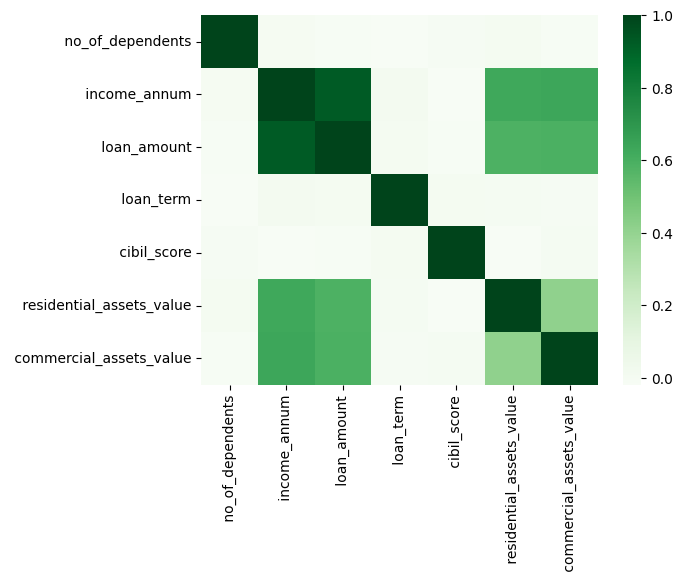

In [ ]:
# Correlation matrix
data = df.drop([' bank_asset_value',' luxury_assets_value'], axis=1)
new_corr_matrix = data.corr(numeric_only= True)
sns.heatmap(new_corr_matrix, cmap="Greens")

In [ ]:
# Binary encoding :
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['self_employed'] = label_encoder.fit_transform(df[' self_employed'])

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

In [ ]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


## **Model Building :**

### **Data Splitting :**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop([' loan_status'],axis=1)
Y = data[' loan_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2870, 10), (1231, 10), (2870,), (1231,))

### **Models Training and Evaluation :**

We will use the following models to predict the loan status : Logistic Regression, Random Forest, KNN, and SVM.  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,  criterion = 'entropy',  random_state =7)
svc = SVC()
lc = LogisticRegression()

In [ ]:
# Predictions on the training dataset :

for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train,Y_pred))

Accuracy score of  RandomForestClassifier = 99.82578397212544
Accuracy score of  KNeighborsClassifier = 77.77003484320556
Accuracy score of  SVC = 62.857142857142854
Accuracy score of  LogisticRegression = 63.937282229965156


Random Forest Classifier is giving the best performance with an accuracy score of 99.79%

In [ ]:
# Predictions on the test set :

for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ", clf.__class__.__name__,"=", 100*metrics.accuracy_score(Y_test, Y_pred))

Accuracy score of  RandomForestClassifier = 96.75060926076361
Accuracy score of  KNeighborsClassifier = 52.64012997562957
Accuracy score of  SVC = 60.68237205523964
Accuracy score of  LogisticRegression = 60.926076360682366


Random Forest Classifier is giving the best accuracy with an accuracy score of 97.3% for the test dataset

In [ ]:
client1 = pd.DataFrame({
    'loan_id': [4270],
    ' no_of_dependents': [3],
    ' education': [1],
    ' self_employed': [0],
    ' income_annum': [100000],
    ' loan_amount': [50000],
    ' loan_term': [12],
    ' cibil_score': [510],
    ' residential_assets_value': [15000],
    ' commercial_assets_value': [0]})

# Prediction using RF :
prediction = rfc.predict(client1)

if prediction[0] == 0:
    print("Loan Approved")
else:
    print("Loan Rejected")


Loan Rejected


In [ ]:
client2 = pd.DataFrame({
    'loan_id': [4271],
    ' no_of_dependents': [1],
    ' education': [0],
    ' self_employed': [1],
    ' income_annum': [100000],
    ' loan_amount': [500000],
    ' loan_term': [24],
    ' cibil_score': [600],
    ' residential_assets_value': [15000],
    ' commercial_assets_value': [0]})

prediction = rfc.predict(client2)

if prediction[0] == 0:
    print("Loan Approved")
else:
    print("Loan Rejected")


Loan Approved


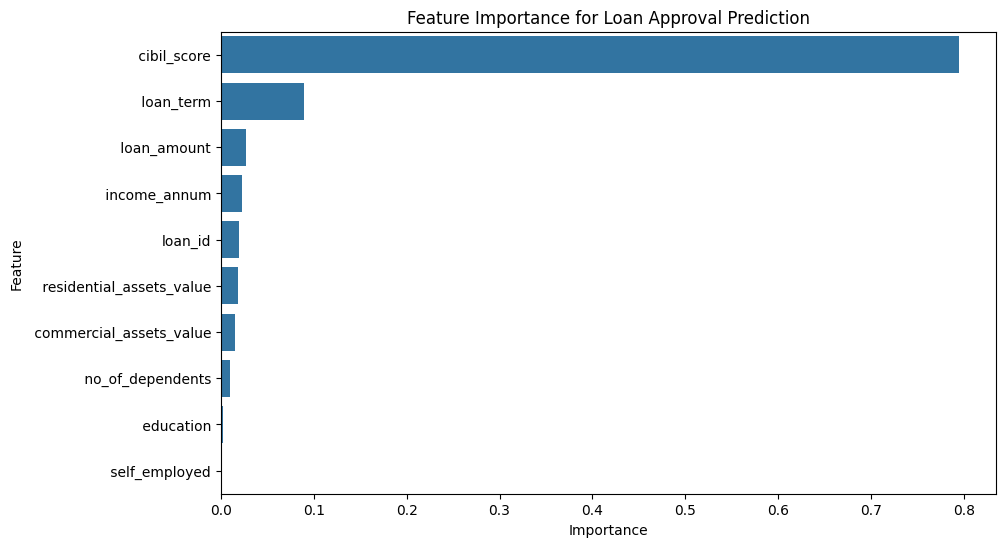

In [ ]:
# Feature importance
importances = rfc.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Loan Approval Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Same client different cibil score :

cs1 = pd.DataFrame({
    'loan_id': [4271],
    ' no_of_dependents': [3],
    ' education': [1],
    ' self_employed': [0],
    ' income_annum': [100000],
    ' loan_amount': [50000],
    ' loan_term': [12],
    ' cibil_score': [500],
    ' residential_assets_value': [15000],
    ' commercial_assets_value': [0]})

cs2 = pd.DataFrame({
    'loan_id': [4272],
    ' no_of_dependents': [3],
    ' education': [1],
    ' self_employed': [0],
    ' income_annum': [100000],
    ' loan_amount': [50000],
    ' loan_term': [12],
    ' cibil_score': [610],
    ' residential_assets_value': [15000],
    ' commercial_assets_value': [0]})

# Prediction using RF :
prediction1 = rfc.predict(cs1)
prediction2 = rfc.predict(cs2)


if prediction1[0] == 0:
    print("Loan Approved")
else:
    print("Loan Rejected")

if prediction2[0] == 0:
    print("Loan Approved")
else:
    print("Loan Rejected")

Loan Rejected
Loan Approved


An increase in the cibil score increases the chances of the loan to be approved.
